In [21]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.set_palette('muted')
plt.rcParams['figure.figsize'] = (7, 5)

In [22]:
kl_clip_files = ["tests/half_cheetah_PPO_default_1_env_run_1_12-12-2018_15:27:52/progress.csv",
                "tests/half_cheetah_PPO_default_1_env_run_2_12-12-2018_15:57:39/progress.csv",
                "tests/half_cheetah_PPO_default_1_env_run_3_12-12-2018_16:27:09/progress.csv"]
kl_clip_runs = pd.concat([pd.read_csv(file) for file in kl_clip_files], sort=True)

kl_penalty_files = ["tests/half_cheetah_PPO_const_penalty_1_env_run_1_12-12-2018_15:28:22/progress.csv",
                "tests/half_cheetah_PPO_const_penalty_1_env_run_2_12-12-2018_15:58:15/progress.csv",
                "tests/half_cheetah_PPO_const_penalty_1_env_run_3_12-12-2018_16:27:45/progress.csv"]
kl_penalty_runs = pd.concat([pd.read_csv(file) for file in kl_penalty_files], sort=True)

kl_adaptive_penalty_files = ["tests/half_cheetah_PPO_adapt_penalty_1_env_run_1_12-12-2018_15:28:33/progress.csv",
                "tests/half_cheetah_PPO_adapt_penalty_1_env_run_2_12-12-2018_15:58:31/progress.csv",
                "tests/half_cheetah_PPO_adapt_penalty_1_env_run_3_12-12-2018_16:28:19/progress.csv"]
kl_adaptive_penalty_runs = pd.concat([pd.read_csv(file) for file in kl_adaptive_penalty_files], sort=True)

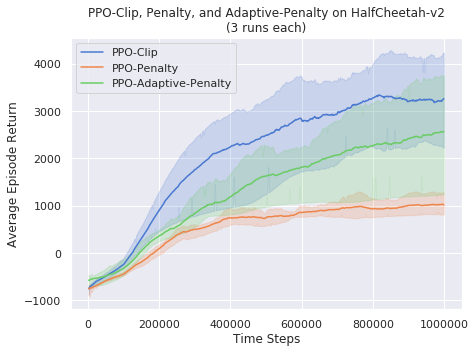

In [23]:
# data = df.groupby(['Name', 'Year']).mean().reset_index(), 
#               x='Year', y='Pts', hue='Name'
sns.lineplot(data=kl_clip_runs,x='time_steps', y='avg_ep_return', label='PPO-Clip')
sns.lineplot(data=kl_penalty_runs,x='time_steps', y='avg_ep_return', label='PPO-Penalty')
sns.lineplot(data=kl_adaptive_penalty_runs,x='time_steps', y='avg_ep_return', label='PPO-Adaptive-Penalty')
plt.xlabel("Time Steps")
plt.ylabel("Average Episode Return")
plt.title("PPO-Clip, Penalty, and Adaptive-Penalty on HalfCheetah-v2\n(3 runs each)")
plt.legend(loc="upper left")
plt.savefig("images/ppo_penalties.png")

In [24]:
ppo_default_breakout_file = "tests/breakout_ppo_default_params_12-12-2018_00:29:19/progress.csv"
ppo_default_breakout_run = pd.read_csv(ppo_default_breakout_file)

ppo_seperate_cnns_breakout_file = "tests/breakout_ppo_seperate_networks_12-12-2018_07:39:00/progress.csv"
ppo_seperate_cnns_breakout_run = pd.read_csv(ppo_seperate_cnns_breakout_file)

ppo_no_entropy_file = "tests/breakout_ppo_no_entropy_term_12-12-2018_04:07:54/progress.csv"
ppo_no_entropy_run = pd.read_csv(ppo_no_entropy_file)


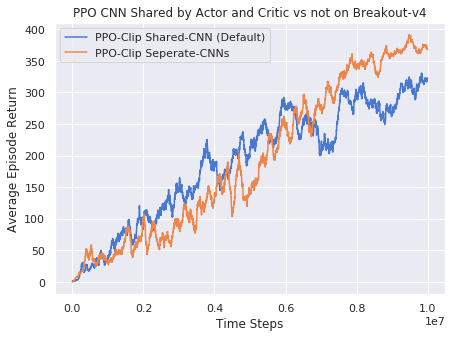

In [25]:
sns.lineplot(data=ppo_default_breakout_run,x='time_steps', y='avg_ep_return', label='PPO-Clip Shared-CNN (Default)')
sns.lineplot(data=ppo_seperate_cnns_breakout_run,x='time_steps', y='avg_ep_return', label='PPO-Clip Seperate-CNNs')
plt.xlabel("Time Steps")
plt.ylabel("Average Episode Return")
plt.title("PPO CNN Shared by Actor and Critic vs not on Breakout-v4")
plt.legend(loc="upper left")
plt.savefig("images/ppo_shared_cnn_or_not.png")

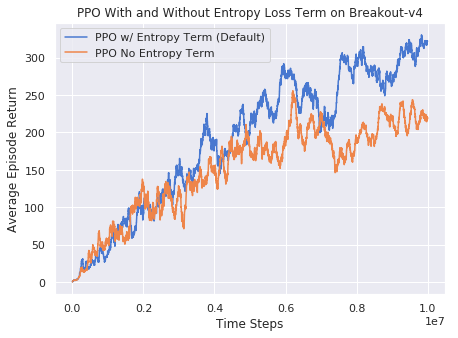

In [26]:
sns.lineplot(data=ppo_default_breakout_run,x='time_steps', y='avg_ep_return', label='PPO w/ Entropy Term (Default)')
sns.lineplot(data=ppo_no_entropy_run,x='time_steps', y='avg_ep_return', label='PPO No Entropy Term')
plt.xlabel("Time Steps")
plt.ylabel("Average Episode Return")
plt.title("PPO With and Without Entropy Loss Term on Breakout-v4")
plt.legend(loc="upper left")
plt.savefig("images/ppo_entropy_term_or_not.png")

In [27]:
a2c_8workers_breakout_file = "tests/breakout_A2C_8_envs_12-12-2018_01:05:57/progress.csv"
a2c_8workers_breakout_run = pd.read_csv(a2c_8workers_breakout_file)

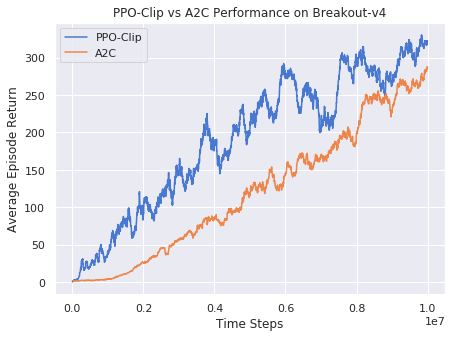

In [28]:
sns.lineplot(data=ppo_default_breakout_run,x='time_steps', y='avg_ep_return', label='PPO-Clip')
sns.lineplot(data=a2c_8workers_breakout_run,x='total_timesteps', y='avg_episode_return', label='A2C')
plt.xlabel("Time Steps")
plt.ylabel("Average Episode Return")
plt.title("PPO-Clip vs A2C Performance on Breakout-v4")
plt.legend(loc="upper left")
plt.savefig("images/ppo_vs_a2c_breakout.png")

In [29]:
trpo_halfcheetah_files = ["tests/half_cheetah_TRPO_1_env_run_3_12-12-2018_19:31:30/progress.csv",
                "tests/half_cheetah_TRPO_1_env_run_2_12-12-2018_19:10:13/progress.csv",
                "tests/half_cheetah_TRPO_1_env_run_1_12-12-2018_18:48:58/progress.csv"]
trpo_halfcheetah_runs = pd.concat([pd.read_csv(file) for file in trpo_halfcheetah_files], sort=True)

ddpg_halfcheetah_files = ["tests/half_cheetah_DDPG_1_env_run_3_12-12-2018_17:54:18/progress.csv",
                "tests/half_cheetah_DDPG_1_env_run_2_12-12-2018_16:52:31/progress.csv",
                "tests/half_cheetah_DDPG_1_env_run_1_12-12-2018_15:41:19/progress.csv"]
ddpg_halfcheetah_runs = pd.concat([pd.read_csv(file) for file in ddpg_halfcheetah_files], sort=True)

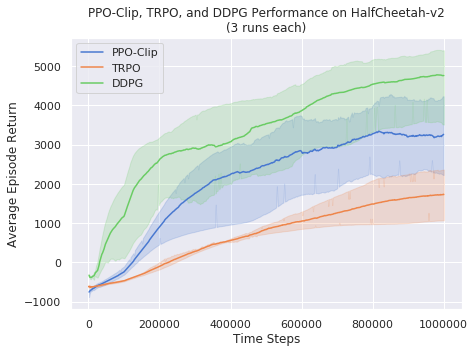

In [30]:
sns.lineplot(data=kl_clip_runs,x='time_steps', y='avg_ep_return', label='PPO-Clip')
sns.lineplot(data=trpo_halfcheetah_runs,x='TimestepsSoFar', y='avg_ep_return', label='TRPO')
sns.lineplot(data=ddpg_halfcheetah_runs,x='total/steps', y='avg_ep_return', label='DDPG')

plt.xlabel("Time Steps")
plt.ylabel("Average Episode Return")
plt.title("PPO-Clip, TRPO, and DDPG Performance on HalfCheetah-v2\n(3 runs each)")
plt.legend(loc="upper left")
plt.savefig("images/ppo_trpo_ddpg_halfcheetah.png")